In [1]:
# 弹幕泳道管理类
import cv2
import numpy as np 
from PIL import Image,ImageDraw,ImageFont
import math
import random

In [2]:
# 定义类
class Danmu_track:
    def __init__(self,text_list,w,h,color=(255,0,255,255),size=40,speed=10):
        """
        构造方法
        @param text_list list 本泳道文字列表
        @param w,h,int 泳道宽高
        @param color tuple 泳道文字颜色
        @param size int 泳道文字大小
        @param speed int 文字速度（像素/帧）
        """
        # 文字列表
        self.text_list = text_list
        # 画面宽度
        self.w = w
        # 画面高度
        self.h = h
        # 颜色
        self.color = color
        # 字体大小
        self.size = size
        # 速度
        self.speed = speed
        # 背景
        self.bg =self.create_bg()
        # 文字列表转长字符
        self.long_text = self.text_list_str()
        
    def create_bg(self):
        """
        绘制透明背景图
        @return Image
        """
        return Image.new('RGBA',(self.w,self.h),(255,0,255,50))

    def generate_blanks(self,num):
        """
        生成指定数量的空格字符
        """
        str = ' '
        for i in range(num):
            str += " "
        return str

    
    def text_list_str(self):
        """
        文字列表转为字符
        """
        text_str = ""
        for text in self.text_list:
            text_str += (text + self.generate_blanks(10))

        return text_str
    def create_frame(self,frame_index):
        """
        绘制第frame_index帧位置的泳道画面
        """
        pass
        # 添加背景图
        bg = self.bg.copy()

        # 添加文字
        d = ImageDraw.Draw(bg)
        font =  ImageFont.truetype('./fonts/MSYH.ttc',self.size,encoding='utf-8')
        offset = 100 - frame_index * self.speed
        d.text((offset,10),self.long_text,font=font,fill=self.color)
        return bg
        

In [3]:
text_list = ['知行合一','好好学习','天天向上']

In [5]:
track = Danmu_track(text_list,400,100,speed=10)

In [6]:
track.text_list_str()

'知行合一           好好学习           天天向上           '

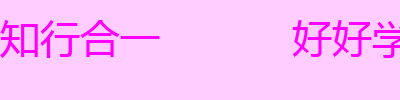

In [7]:
track.create_frame(10)

In [8]:
# 弹幕层管理类

In [9]:
class danmu_layer:
    """
    输出第X帧的弹幕画面
    """
    def __init__(self,text_path,frame_w,frame_h):
        """
        构造方法
        @param text_path str 弹幕文本路径
        @param frame_w,frame_h int 画面宽度和高度
        """
        # 弹幕文本路径
        self.text_path = text_path
        self.frame_w = frame_w
        self.frame_h = frame_h

        # 轨道高度
        self.track_height = 100
        # 轨道数量
        self.track_num = int(frame_h / self.track_height)

        # 分配文字
        self.text_arr = self.distribute_text()
        # 创建多个弹幕轨道实例
        # 创建弹幕轨道
        self.danmu_track_obj_list = []

        # 创建颜色库
        # 创建速度库
        speed_list = [2,4,6,8]
        color_list = [(255,255,255,255),(255,0,0,255),(255,0,255,255),(0,255,0,255),(0,255,255,255),(255,255,0,255)]
        for track_id in range(self.track_num):
            color = random.choice(color_list)
            speed = random.choice(speed_list)
            danmu_obj = Danmu_track(self.text_arr[track_id],self.frame_w,100,color=color,speed=speed)
            self.danmu_track_obj_list.append(danmu_obj)

        # 大图
        self.bg = self.create_bg()

    def create_bg(self):
        """
        创建透明大图
        """
        return Image.new('RGBA',(self.frame_w,self.frame_h),(255,0,255,50))
    def text_to_text(self):
        """
        弹幕文本转为list
        @return text_list list 文本列表
        """
        text_list = None
        with open(self.text_path,'r',encoding='utf-8') as f:
            text_list = [f.strip() for f in f.readlines()]
        return text_list

    def distribute_text(self):
        """
        将弹幕文本转为numpy数组
        """
        text_list = self.text_to_text()
        # 文本长度
        text_len = len(text_list)
        
        # 轨道数量
        track_num = self.track_num
        # 列数（单个轨道最多放几个元素）
        track_max_num = math.ceil(text_len / self.track_num)

        # 矩阵元素数量
        element_num = track_num * track_max_num
        # 创建索引矩阵
        indexes_arr = np.arange(element_num).reshape(track_max_num,track_num)
        # 转置
        indexes_arr_trans = indexes_arr.T

        # 将文字列表空位补成‘ ’
        append_blanks = ["" for i in range(element_num - text_len)]
        final_text_list = np.concatenate((text_list,append_blanks))
        
        return final_text_list[indexes_arr_trans]
    def generate_frame(self,frame_index):
        """
        绘制第frame_index帧的弹幕层
        """
        bg = self.bg.copy()
        # 遍历轨道
        for track_id,track_obj in enumerate(self.danmu_track_obj_list):
            img = track_obj.create_frame(frame_index)
            bg.paste(img,(0,self.track_height * track_id ))
        return bg
    

In [10]:
text_path = 'danmu_real.txt'
layer = danmu_layer(text_path,800,500)

In [11]:
layer.distribute_text()

array([['你没有如期归来，而这也正是离别的意义。oｂ（￣▽￣）ｄ', '在一堵坚硬的高墙和一只撞向它的蛋之间，我会永远站在蛋这一边。',
        '孩子回答说：「我是即将来到的日子。」', '把不忙不闲的工作做的出色，把不咸不淡的生活过得精彩。',
        '有些人不会忘，由于不舍得；有些人必需要忘，因为不值得。'],
       ['世界让我遍体鳞伤，但伤口长出的却是翅膀。ψ(｀∇´)ψ', '哪个更痛苦，努力还是后悔？',
        '这个人也许永远不回来了，也许明天回来。', '世界上只有想不通的人，没有走不通的路。',
        '我相信，梦里能到达的地方，总有一天，脚步也能到达。'],
       ['我从不做谁的第二选择', '垃圾话的真谛在于我不光说你垃圾，还能在球场上证明你垃圾。',
        '那些都是很好很好的，可我偏不喜欢。', '不要后悔，无论怎样都不要后悔，后悔的情绪比你所做错的事更加可怕',
        '天使之所以会飞，是因为她们把自己看得很轻……'],
       ['该走的弯路，我都替你走过了', '为你，千千万万遍。', '成功只有一个——按照自己的方式，去度过人生。',
        '生活岂能百般如意，正因有了遗漏和缺憾，我们才会有所追寻。', '爱情就像攥在手里的沙子，攥的越紧，流失的越快。'],
       ['老爹，你最光荣的时候是代表全日本吗？而我，就是现在了。', '一个人只拥有此生此世是不够的，他还应该拥有诗意的世界。',
        '在事实面前，我们的想象力越发达，后果就越不堪设想。', '我等待，只为了你的爱。', '']], dtype='<U31')

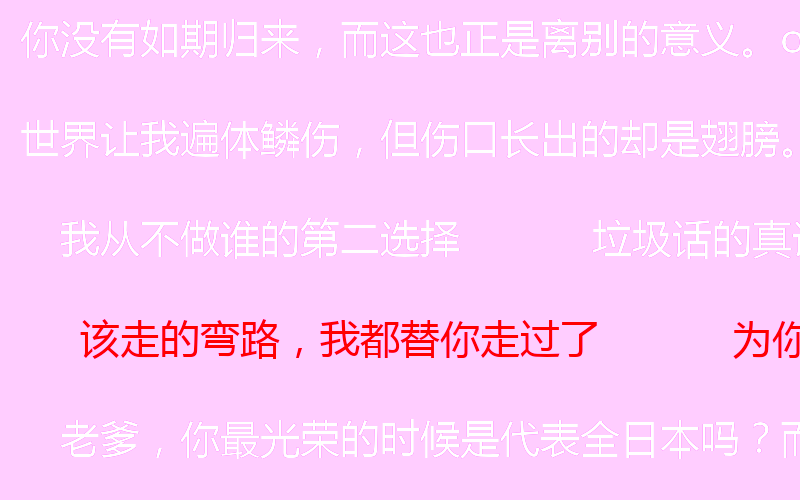

In [12]:
layer.generate_frame(10)